In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)

import pywt

In [30]:
signal = pd.read_csv("../datasets/hfbc_returns_1D.csv", index_col=0).squeeze()

1. Sampling rate - 1H
2. 2H
3. 4H
4. 8H
5. 16H
6. 32H 1.3D
7. 64H 2.6D
8. 128H 5.3D
9. 256H 10.6D


1. Sampling rate - 1D
2. 2D
3. 4D
4. 8D

In [31]:
signal = np.abs(signal)

In [41]:
y_min = -0.2
y_max = 0.2
num_decompositions = 5


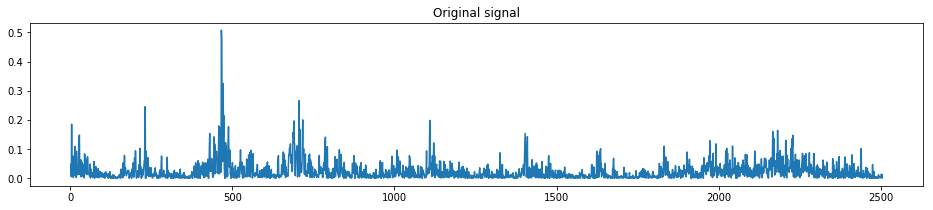

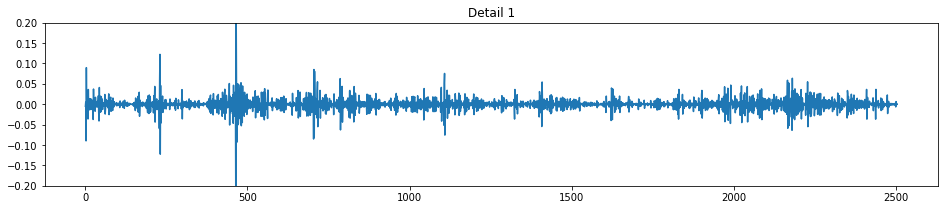

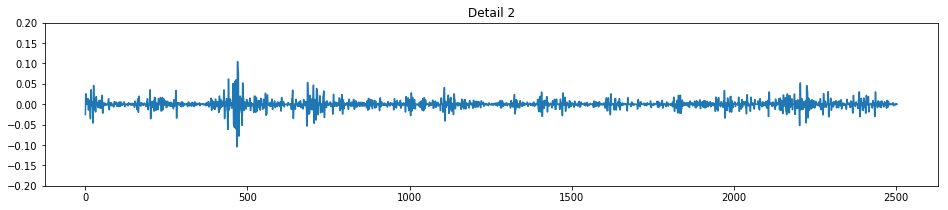

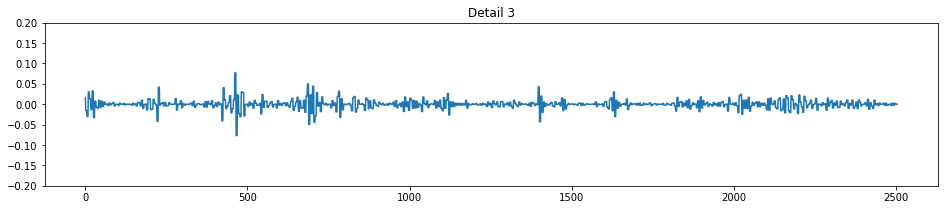

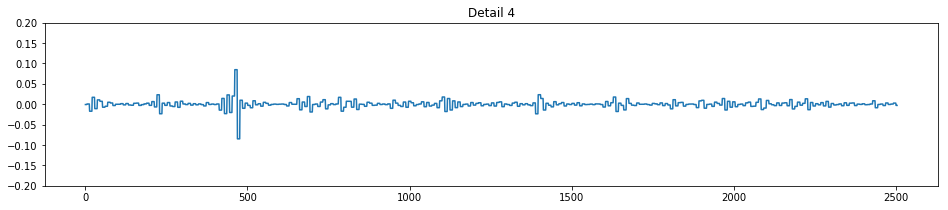

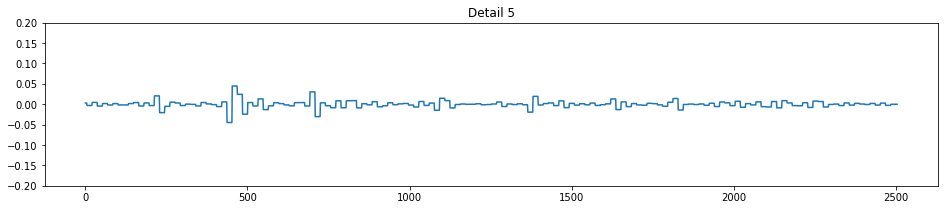

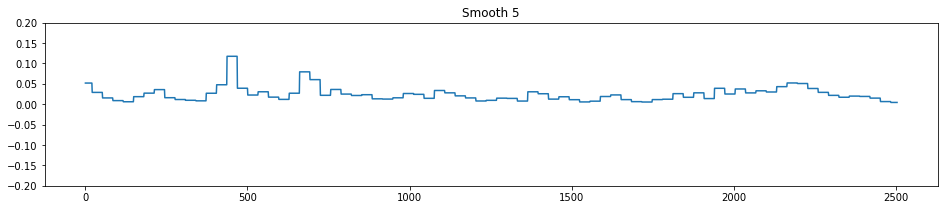

In [42]:
wavelet = "haar"
decomposition = pywt.wavedec(signal, wavelet, level=num_decompositions)

plt.title("Original signal")
plt.plot(signal)
plt.show()

for i in range(num_decompositions, 0, -1):
    level = num_decompositions+1-i
    axes = plt.gca()
    axes.set_ylim([y_min,y_max])
    plt.title("Detail "+str(level))
    d = decomposition[i]
    d = pywt.upcoef("d", d, wavelet, num_decompositions+1-i, signal.shape[0])
    plt.plot(d)
    plt.show()
    
a = decomposition[0]
a = pywt.upcoef("a", a, wavelet, num_decompositions, signal.shape[0])
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.title("Smooth " + str(num_decompositions))
plt.plot(a)
plt.show()

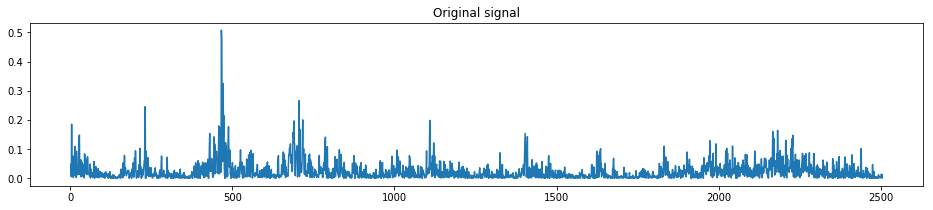

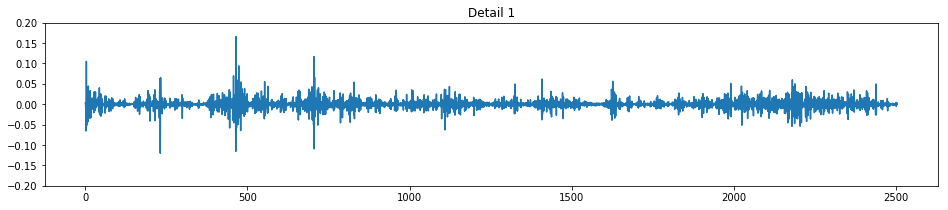

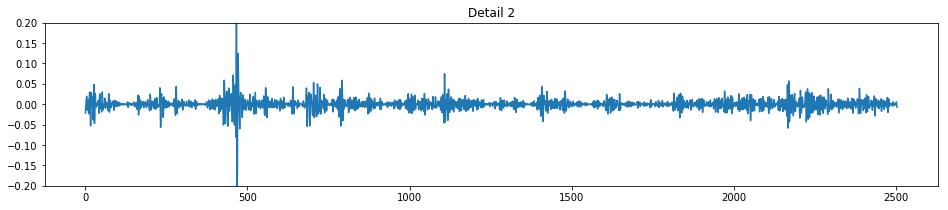

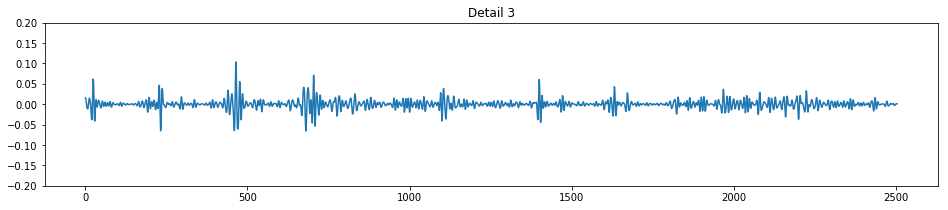

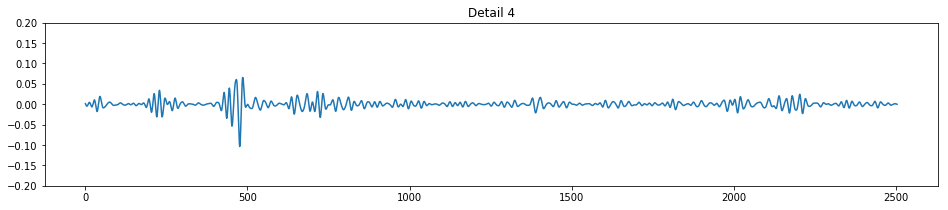

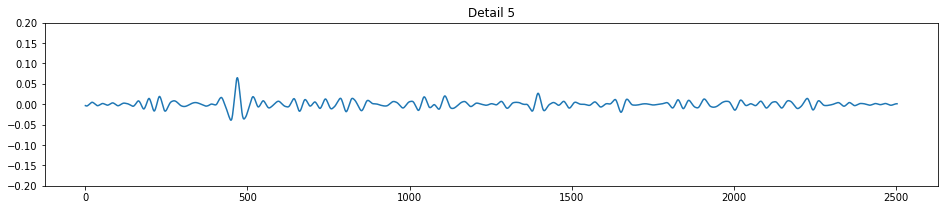

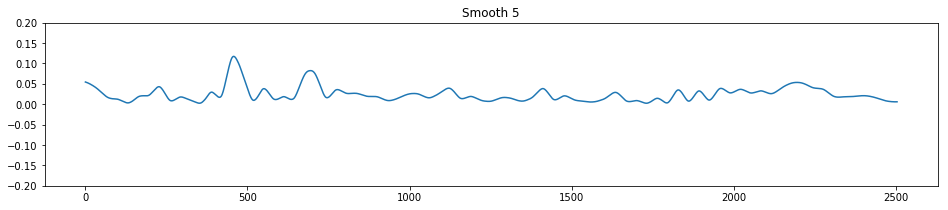

In [44]:
wavelet = "sym8"
decomposition = pywt.wavedec(signal, wavelet, level=num_decompositions)



plt.title("Original signal")
plt.plot(signal)
plt.show()
d_list = []
for i in range(num_decompositions, 0, -1):
    level = num_decompositions+1-i
    axes = plt.gca()
    axes.set_ylim([y_min,y_max])
    plt.title("Detail "+str(level))
    d = decomposition[i]
    d = pywt.upcoef("d", d, wavelet, num_decompositions+1-i, signal.shape[0])
    d_list.append(d)
    plt.plot(d)
    plt.show()
    
a = decomposition[0]
a = pywt.upcoef("a", a, wavelet, num_decompositions, signal.shape[0])
d_list.append(a)
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.title("Smooth " + str(num_decompositions))
plt.plot(a)
plt.show()

In [54]:

series = d_list[0] + d_list[1]+d_list[2] + d_list[3] 


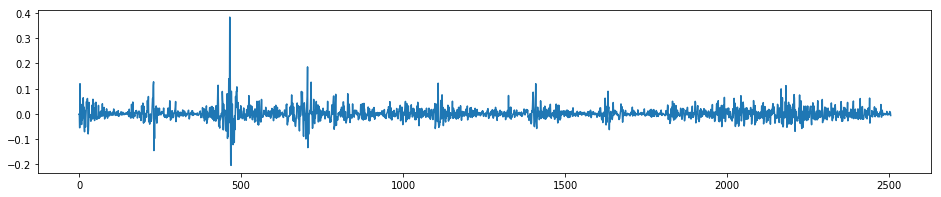

In [64]:
noise = series
plt.plot(noise)

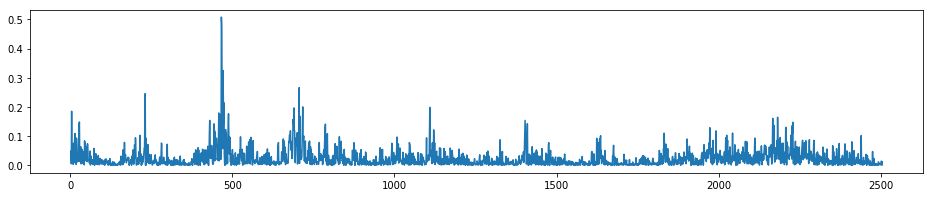

In [65]:
plt.plot(signal)

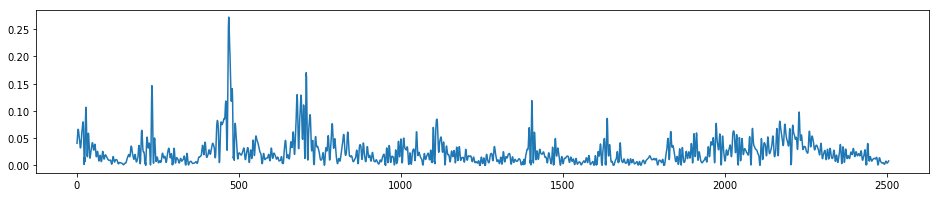

In [66]:
plt.plot(np.abs(signal - noise))